### Training an autoencoder as a 2D feature generator and displaying CIFAR10 dataset's features

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, _), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_data = np.concatenate((x_train, x_test), axis=0)
(_, y_train), (_, y_test) = tf.keras.datasets.cifar10.load_data()
y_data = np.concatenate((y_train, y_test), axis=0)

# Normalize images
x_data = x_data.astype('float32') / 255.


In [ ]:
# Encoder
input_img = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Flatten()(x)
encoded = layers.Dense(2, name='encoded_layer')(x)  # 2D encoded features

# Decoder
x = layers.Dense(8 * 8 * 64, activation='relu')(encoded)
x = layers.Reshape((8, 8, 64))(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(3, (3, 3), strides=2, activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, x)
autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
autoencoder.fit(x_data, x_data, epochs=10, batch_size=256, shuffle=True)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0519
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0372
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0369
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0369
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0369
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0367
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0368
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0368
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0367
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0367


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


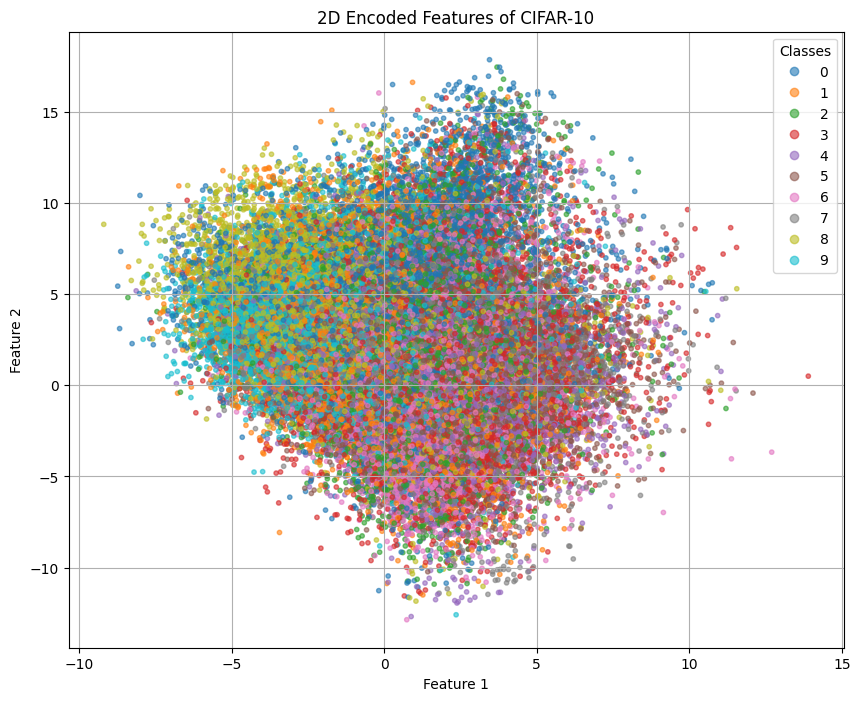

In [ ]:
# Create encoder model
encoder = models.Model(inputs=input_img, outputs=autoencoder.get_layer('encoded_layer').output)

# Extract 2D features
features_2d = encoder.predict(x_data)

# Plot with labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=y_data.flatten(), cmap='tab10', alpha=0.6, s=10)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("2D Encoded Features of CIFAR-10")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


### Comparing autoencoder generated features with features extracted by a pre-trained CNN and reduced by dimension reduction techniques like PCA, t-SNE.


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0).flatten()


In [5]:
x_data = x_data[:5000]
y_data = y_data[:5000]

# Normalize for autoencoder
x_data_ae = x_data.astype('float32') / 255.

# Resize for VGG16
x_data_vgg = tf.image.resize(x_data, [224, 224])
x_data_vgg = preprocess_input(x_data_vgg)
#Your session crashed after using all available RAM.

In [6]:
# Autoencoder architecture
input_img = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Flatten()(x)
encoded = layers.Dense(2, name='encoded')(x)

x = layers.Dense(8 * 8 * 64, activation='relu')(encoded)
x = layers.Reshape((8, 8, 64))(x)
x = layers.Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(3, 3, strides=2, activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, x)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_data_ae, x_data_ae, epochs=10, batch_size=256, shuffle=True)

encoder = models.Model(inputs=input_img, outputs=autoencoder.get_layer('encoded').output)
features_ae = encoder.predict(x_data_ae)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 744ms/step - loss: 0.0645
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0635
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0648
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0635
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0633
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0622
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0618
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0610
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0589
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0564
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [7]:
# Pretrained VGG16 as feature extractor
vgg = VGG16(weights='imagenet', include_top=False, pooling='avg')
features_vgg = vgg.predict(x_data_vgg, batch_size=64)

# Dimensionality reduction
features_vgg_pca = PCA(n_components=2).fit_transform(features_vgg)
features_vgg_tsne = TSNE(n_components=2, perplexity=30, learning_rate=200).fit_transform(features_vgg)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step


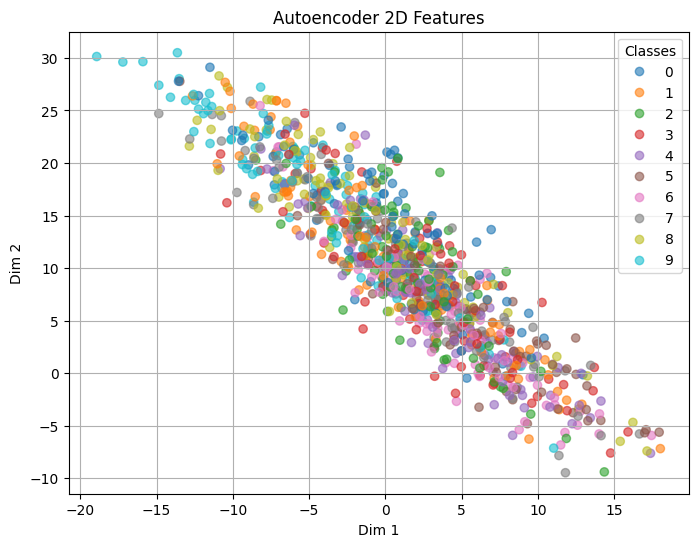

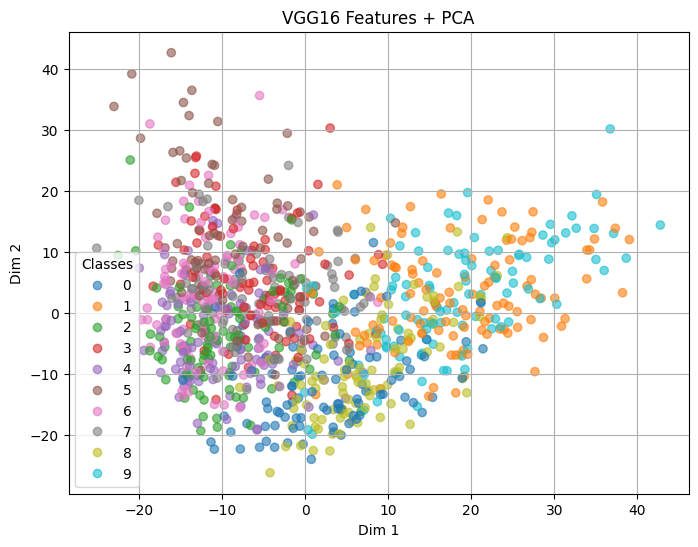

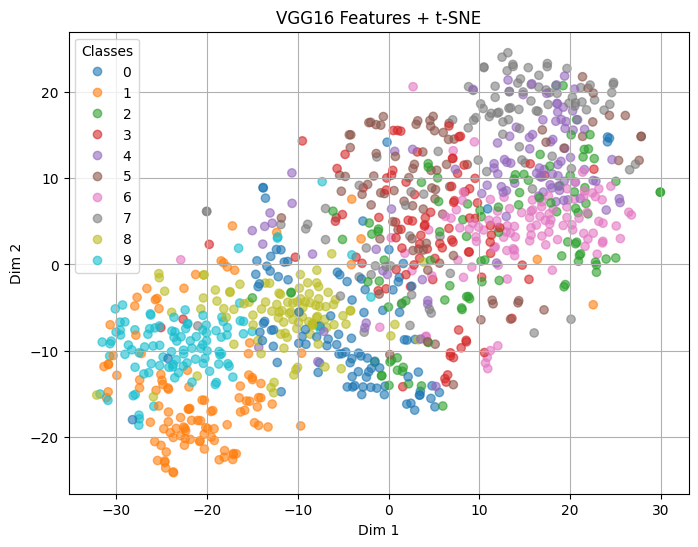

In [9]:
def plot_features(features, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(features[:, 0], features[:, 1], c=y_data, cmap='tab10', alpha=0.6)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title(title)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.grid(True)
    plt.show()

plot_features(features_ae, "Autoencoder 2D Features")
plot_features(features_vgg_pca, "VGG16 Features + PCA")
plot_features(features_vgg_tsne, "VGG16 Features + t-SNE")


### Training a denoising autoencoder for CIFAR10 dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

# Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Add Gaussian noise
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to [0,1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
input_img = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [4]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.5680 - val_loss: 0.5673
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.5656 - val_loss: 0.5656
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.5648 - val_loss: 0.5650
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.5635 - val_loss: 0.5644
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.5636 - val_loss: 0.5640
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.5627 - val_loss: 0.5639
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.5621 - val_loss: 0.5635
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.5621 - val_loss: 0.5625
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.5617 - val_loss: 0.5628
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.5615 - val_loss: 0.5621


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


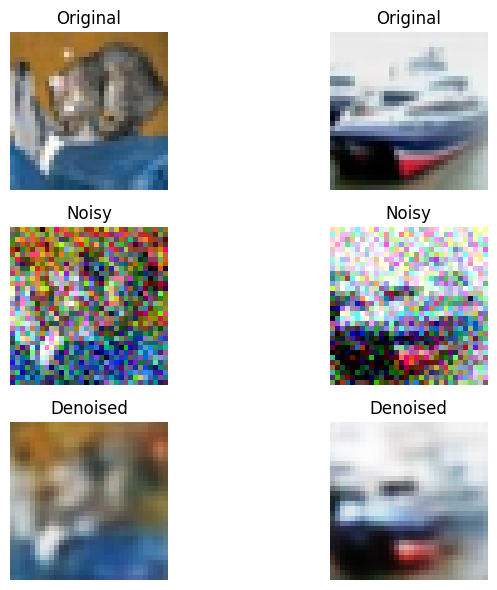

In [14]:
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plot original, noisy, and denoised
n = 2
plt.figure(figsize=(8, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised")
    plt.axis('off')
plt.tight_layout()
plt.show()


### Training a CNN based CIFAR-10 classifier without any single-image data augmentation techniques

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models,Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [16]:
# Input layer
inputs = Input(shape=(32, 32, 3))

# Convolutional blocks
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

# Create model
model = models.Model(inputs=inputs, outputs=outputs)


In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=2)


Epoch 1/20
782/782 - 15s - 19ms/step - accuracy: 0.4481 - loss: 1.5164 - val_accuracy: 0.5867 - val_loss: 1.1458
Epoch 2/20
782/782 - 12s - 15ms/step - accuracy: 0.6025 - loss: 1.1288 - val_accuracy: 0.6544 - val_loss: 0.9664
Epoch 3/20
782/782 - 5s - 7ms/step - accuracy: 0.6627 - loss: 0.9614 - val_accuracy: 0.7006 - val_loss: 0.8551
Epoch 4/20
782/782 - 4s - 6ms/step - accuracy: 0.6986 - loss: 0.8583 - val_accuracy: 0.7315 - val_loss: 0.7719
Epoch 5/20
782/782 - 5s - 6ms/step - accuracy: 0.7247 - loss: 0.7859 - val_accuracy: 0.7461 - val_loss: 0.7311
Epoch 6/20
782/782 - 4s - 6ms/step - accuracy: 0.7422 - loss: 0.7322 - val_accuracy: 0.7567 - val_loss: 0.6965
Epoch 7/20
782/782 - 5s - 6ms/step - accuracy: 0.7538 - loss: 0.6997 - val_accuracy: 0.7650 - val_loss: 0.6743
Epoch 8/20
782/782 - 6s - 7ms/step - accuracy: 0.7666 - loss: 0.6588 - val_accuracy: 0.7693 - val_loss: 0.6736
Epoch 9/20
782/782 - 12s - 15ms/step - accuracy: 0.7776 - loss: 0.6301 - val_accuracy: 0.7744 - val_loss: 0.

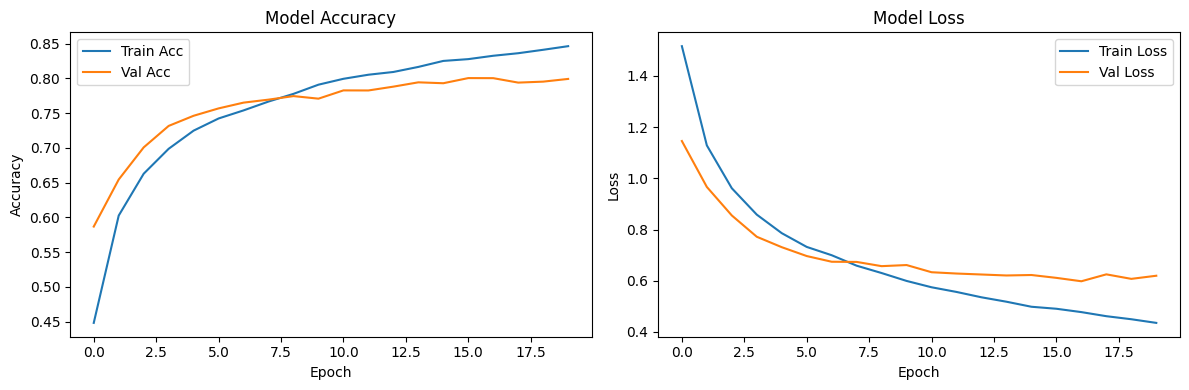

In [18]:
plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


### Training a CNN based CIFAR-10 classifier with a single/multiple single-image data augmentation techniques

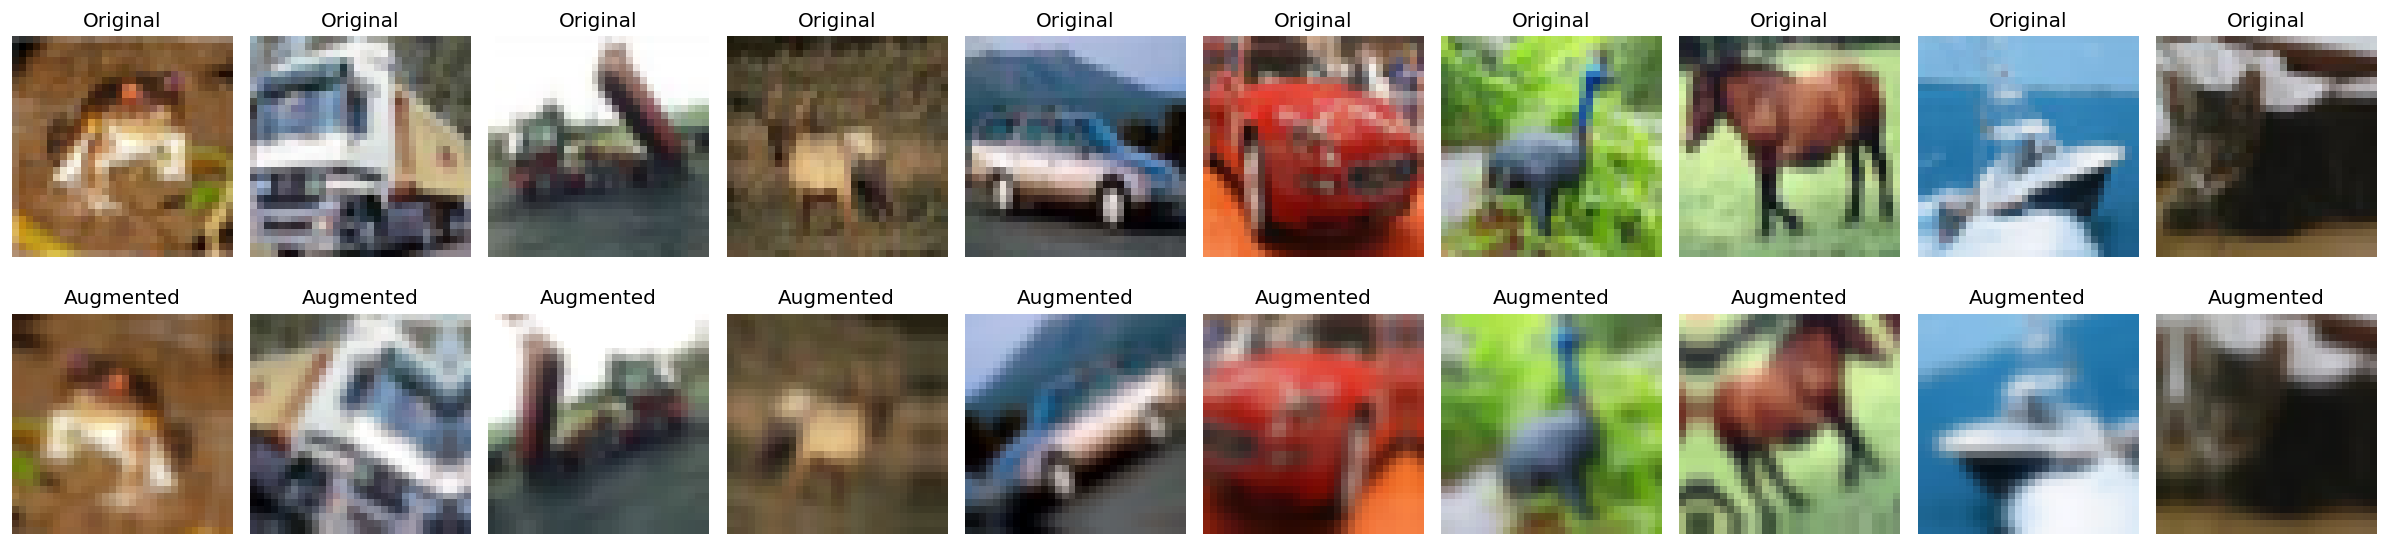

Epoch 1/20
782/782 - 12s - 15ms/step - accuracy: 0.3456 - loss: 1.7689 - val_accuracy: 0.4820 - val_loss: 1.4203
Epoch 2/20
782/782 - 8s - 11ms/step - accuracy: 0.4578 - loss: 1.4906 - val_accuracy: 0.5273 - val_loss: 1.2995
Epoch 3/20
782/782 - 11s - 13ms/step - accuracy: 0.5059 - loss: 1.3785 - val_accuracy: 0.5557 - val_loss: 1.2486
Epoch 4/20
782/782 - 9s - 11ms/step - accuracy: 0.5336 - loss: 1.3041 - val_accuracy: 0.5911 - val_loss: 1.1519
Epoch 5/20
782/782 - 9s - 11ms/step - accuracy: 0.5520 - loss: 1.2597 - val_accuracy: 0.5995 - val_loss: 1.1206
Epoch 6/20
782/782 - 8s - 10ms/step - accuracy: 0.5654 - loss: 1.2258 - val_accuracy: 0.6066 - val_loss: 1.1059
Epoch 7/20
782/782 - 9s - 11ms/step - accuracy: 0.5741 - loss: 1.1939 - val_accuracy: 0.6022 - val_loss: 1.1364
Epoch 8/20
782/782 - 10s - 13ms/step - accuracy: 0.5846 - loss: 1.1726 - val_accuracy: 0.6501 - val_loss: 0.9713
Epoch 9/20
782/782 - 10s - 13ms/step - accuracy: 0.5927 - loss: 1.1451 - val_accuracy: 0.6431 - val_l

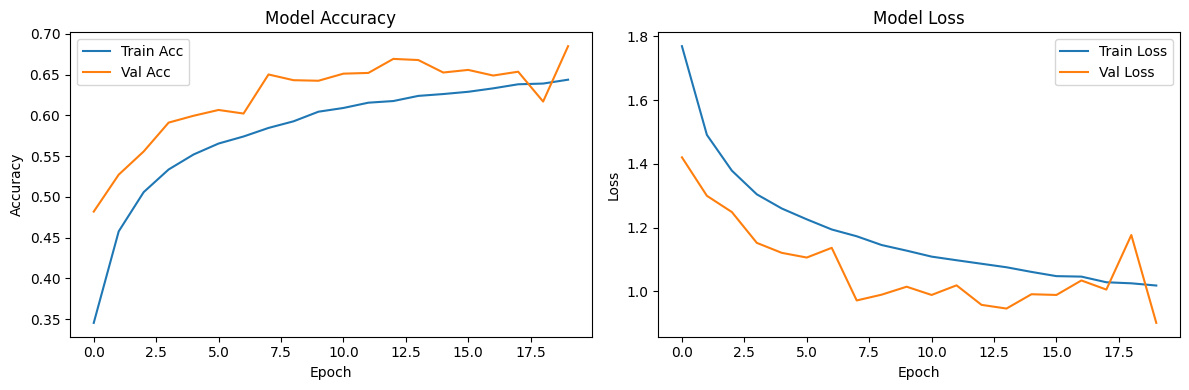

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomContrast(0.1)
], name="data_augmentation")

# Show original vs augmented images
def show_augmented_images(original_images, aug_layer):
    num_images = 10
    sample_images = original_images[:num_images]
    augmented_images = aug_layer(sample_images, training=True)
    augmented_images = tf.clip_by_value(augmented_images, 0.0, 1.0).numpy()

    plt.figure(figsize=(20, 5), dpi=120)
    for i in range(num_images):
        # Original
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(sample_images[i])
        plt.title("Original")
        plt.axis('off')

        # Augmented
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(augmented_images[i])
        plt.title("Augmented")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize
show_augmented_images(x_train, data_augmentation)

# CNN model with augmentation layer
inputs = Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=2)

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
